# Buzzard analysis

In this notebook we will hopefully fit the data from Buzzard.

In [1]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")
plt.rc("errorbar", capsize=2)

In [3]:
import args_assembler
import lensing_models
import probability_distributions as PDFs

In [4]:
model_choices = ["has_RM_selection"]
analysis_name = "Buzzard_redMaPPer"
z_index = 0
lambda_index = 3
args = args_assembler.get_args_dictionary(analysis_name, z_index, lambda_index, model_choices)

Running CLASS for P(k)
CLASS computation complete


In [5]:
def neg_lnpost(params, args):
    return -PDFs.lnposterior(params, args)

In [6]:
A = args["A_matrix_prior_means"]
guess = np.array([13., 5., A[0], A[1], A[2]])
result = op.minimize(neg_lnpost, guess , args=(args,))
print(result)

      fun: 5.833044759949361
 hess_inv: array([[2.20975425e-03, 1.04302565e-02, 3.30305928e-05, 6.16342774e-04,
        2.32311320e-04],
       [1.04302565e-02, 4.17592718e-01, 1.22167864e-02, 1.56189821e-02,
        4.17421267e-03],
       [3.30305928e-05, 1.22167864e-02, 2.04870623e-03, 1.52158622e-03,
        2.78602409e-04],
       [6.16342774e-04, 1.56189821e-02, 1.52158622e-03, 1.36170277e-03,
        2.95916952e-04],
       [2.32311320e-04, 4.17421267e-03, 2.78602409e-04, 2.95916952e-04,
        7.26344107e-05]])
      jac: array([ 1.46359205e-03, -6.96778297e-05,  2.25085020e-03, -4.85247374e-03,
        1.49369836e-02])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 717
      nit: 35
     njev: 101
   status: 2
  success: False
        x: array([1.43806096e+01, 5.49847887e+00, 9.38865734e-02, 3.00934825e-02,
       3.39527666e-04])


In [7]:
log10_M, c, a2, a3, a4 = result.x
A = np.array([a2, a3, a4])
parameter_dict = {"log10_M":log10_M, "M":10**log10_M, "c":c, "A_matrix":A}

output = lensing_models.get_lensing_profile(parameter_dict, args, True)

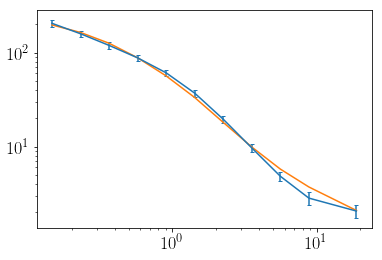

In [8]:
#Plot the data and the model
plt.errorbar(args["R_mid"], args["DeltaSigma_data"], args["DeltaSigma_unc"])
plt.plot(args["R_mid"], output["ave_DeltaSigma"])
plt.loglog();

Text(0.5, 1.0, '$z\\in[0.2,0.35]\\ \\lambda\\in[0.2,0.35)$')

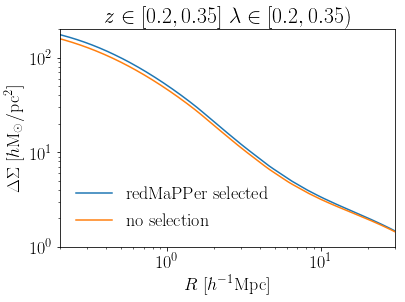

In [9]:
#Plot the model with and without the selection effects
plt.xlim(.2, 30)
plt.ylim(1, 200)
plt.plot(args["R"], output["DeltaSigma_RM_selection"], label="redMaPPer selected")
plt.plot(args["R"], output["DeltaSigma"], label="no selection")
plt.loglog()
plt.legend(frameon=False)
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot}/{\rm pc^2}]$");
title = r"$z\in[{0}]\ \lambda\in[{1})$".format(args["z_title"], args["lambda_title"])
plt.title(title)
#plt.savefig("selection_effect_model.png", dpi=300, bbox_inches="tight")

In [10]:
model_choices = ["has_RM_selection"]
analysis_name = "Buzzard_redMaPPer"
z_index = 0
lambda_index = 3
args2 = args_assembler.get_args_dictionary(analysis_name, z_index, lambda_index, model_choices)

Running CLASS for P(k)
CLASS computation complete


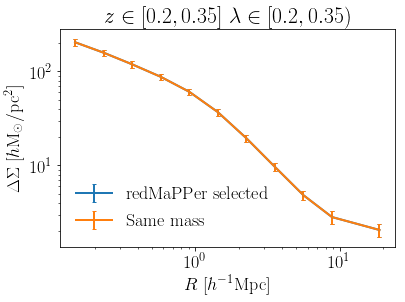

In [11]:
plt.errorbar(args2["R_mid"], args2["DeltaSigma_data"], args2["DeltaSigma_unc"], 
             lw=2, label="redMaPPer selected")
plt.errorbar(args["R_mid"], args["DeltaSigma_data"], args["DeltaSigma_unc"], 
             lw=2, label="Same mass")
plt.loglog()
title = r"$z\in[{0}]\ \lambda\in[{1})$".format(args["z_title"], args["lambda_title"])
plt.title(title)
plt.legend(frameon=False)
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot}/{\rm pc^2}]$");
#plt.savefig("DeltaSigma_selections.png", dpi=300, bbox_inches="tight")